## Image Analysis 

Image smoothing in the spatial and frequency domain


In [1]:
# Importing packages for this assigment/
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import random_noise, img_as_float
import scipy.ndimage.filters
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from skimage import io 
from scipy import signal
from skimage.morphology import square, rectangle, diamond, disk, cube,  octahedron, ball, star, octagon 
%matplotlib inline

Text(0.5, 1.0, 'Blurry grass image from backyard')

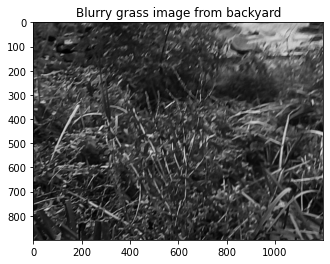

In [2]:
# 1.1

# loading the image 
im1 = io.imread("2079517_rgbimage.jpg")
#im1_gray = io.imread("rice.png")

# convert the color image to graysclae image
im1_gray = color.rgb2gray(im1)

# display the image with a gray color map
plt.imshow(im1_gray, cmap ='gray');plt.title('Blurry grass image from backyard')


In [ ]:
# 1.2 adding 10% salt and peper noice

seed = 42
im_noisy = random_noise(im1_gray, seed=seed, mode='s&p', amount=0.10)

#1.3 we can re-use this function in 1.5

def gaussian_filter (im, sigma):
    
    imgGaussF = scipy.ndimage.gaussian_filter (im_noisy, sigma=sigma)
    return imgGaussF

imgGaussF= gaussian_filter (im_noisy, sigma= 1)

plt.figure(figsize=(15,10))
plt.subplot(131);plt.imshow(im1_gray, cmap='gray');plt.title('Original gray image');plt.axis('off')
plt.subplot(132);plt.imshow(im_noisy, cmap='gray');plt.title('Image with 10% salt and peper noise');plt.axis('off')
plt.subplot(133);plt.imshow(imgGaussF, cmap='gray');plt.title('Image after Gaussian filter');plt.axis('off')

(-0.5, 1199.5, 899.5, -0.5)

(Text(0.5, 1.0, 'Original Image Spectrum'), (-0.5, 1199.5, 899.5, -0.5))

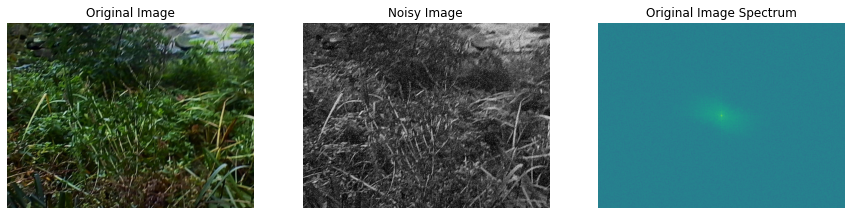

In [22]:
# convert the noisy image to frequency domain and shifting the toward the center 
#im_noisy = im_noisy.astype(float)

im_freq= fftn(im_noisy)
Fshifted = fftshift(im_freq)

# plotting the images
plt.figure(figsize=(15,15))
plt.subplot(1,3,1);plt.imshow(im1,cmap='gray'); plt.title('Original Image'); plt.axis('off')
plt.subplot(1,3,2);plt.imshow(im_noisy,cmap='gray'); plt.title('Noisy Image'); plt.axis('off')
plt.subplot(1,3,3);plt.imshow(20*np.log10( 0.1 + np.abs(Fshifted)));plt.title('Original Image Spectrum'), plt.axis('off')


(Text(0.5, 1.0, 'Filtered Image Spectrum'), (-0.5, 1199.5, 899.5, -0.5))

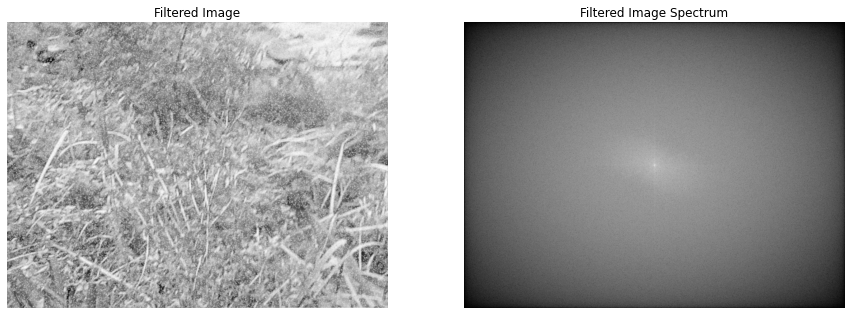

In [23]:
# Gaussian filter 

def gaussian_filter_frequency(im, std):
    """ this function performs Gaussian blur in frequency domain.
    Args:
     im: image as input
     std: standard deviation or simga 
    
    Returns:
        filtered_im:result of gaussian filter in frequency domain
        im_back: transfer the image back to spatial domain
    """
    gauss_kernel = np.outer(signal.gaussian(im.shape[0], std = std), signal.gaussian(im.shape[1], std= std))
    freq_kernel = fftn(ifftshift(gauss_kernel))
    
    # denoise the noisy image
    filtered_im  = im_freq * freq_kernel
    
    im_back = ifftn(filtered_im).real
    return filtered_im, im_back 

# calling the function to get outputs for  plotting
filtered_im, im_back = gaussian_filter_frequency(im_noisy, std=1)



# plotting the result
plt.figure(figsize =(15,15))
plt.subplot(121);plt.imshow(10*np.log10( 0.1 + np.abs(im_back)),cmap='gray');plt.title('Filtered Image'), plt.axis('off')

plt.subplot(122);plt.imshow(np.real(10*np.log10(0.01 + abs(fftshift(filtered_im)))),cmap='gray') ;plt.title('Filtered Image Spectrum'), plt.axis('off')

In [8]:
import timeit

# timer for calculating running time 
def timer (function ):
    """
    This function calculates the running time per iteration 
    Args:
        function_name: 
    Returns:
        result: time for each iteration 
    """
    
    # list of simgas
    sigma_list = [ 1, 2, 16, 32, 64, 128]
    # time result for each item from the list after running the function 
    result = []
    for i in sigma_list:
        start = timeit.default_timer()
        function(im_noisy, i) #  the function for calculating time 
        stop = timeit.default_timer()
        result.append(stop - start)
    return result



# running timer() function for Gaussian filter functions for spatial and frequency domain 

time_spatial = timer(gaussian_filter) # "gaussian_filter" is created in section 1.2
time_frequency = timer (gaussian_filter_frequency) # "gaussian_filter_frequency" is created in section 1.5


print("Running times in spatial domain:", time_spatial)
print("Running times in frequency domain:", time_frequency)

Running times in spatial domain: [0.017243782058358192, 0.09040400409139693, 0.30969489202834666, 0.6110188539605588, 1.3857301089446992, 2.717929322971031]
Running times in frequency domain: [0.16789222112856805, 0.11785948905162513, 0.11465369700454175, 0.172741930000484, 0.11416082503274083, 0.11885620793327689]


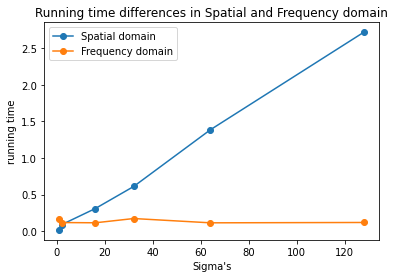

In [9]:
# plotting the result in same plot 
x = [ 1, 2, 16, 32, 64, 128] # list of simgas

plt.plot(x,time_spatial, marker="o",label='Spatial domain')
plt.plot(x,time_frequency,marker="o", label='Frequency domain')
plt.legend(loc='upper left')
plt.title("Running time differences in Spatial and Frequency domain")
plt.xlabel("Sigma's")
plt.ylabel("running time")
plt.show()


Based on the plot, we can conclude that the Gaussian blur operations in frequency domain is consistent and faster than in the frequency domain. The Gaussian blur operation in spatial domain is slowing down, when the kernel size increases. 

(400, 300, 3)


Text(0.5, 1.0, 'Noisy coins image')

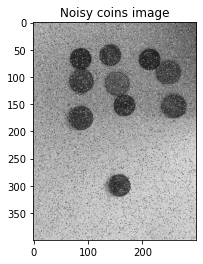

In [7]:
# 1.1

# loading the image 
im2 = io.imread("2079517_coins.jpg")
print(im2.shape)
# change color image to gray image
im2 = color.rgb2gray(im2)
# display the image with a gray color map
plt.imshow(im2, cmap='gray');plt.title('Noisy coins image')


<span style='color:blue'> 
Remove the salt and pepper noise in the image and display the denoised image with an
appropriate title.
<span>

In [5]:
from skimage.morphology import dilation, erosion, opening, closing, white_tophat
struct_elem = disk(1)
im_close= closing (im2, struct_elem) # first closing 
im_close2 = closing(im_close, struct_elem) # second closing 
close_open = opening( im_close2, struct_elem)# opening after second closing 

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(im2,cmap='gray' ), plt.title('noisy original'), plt.axis('off')
plt.subplot(222), plt.imshow(im_close,cmap='gray'), plt.axis('off'), plt.title('Image after first closing')
plt.subplot(223), plt.imshow(im_close2,cmap='gray'), plt.axis('off'), plt.title('Image after second closing')
plt.subplot(224), plt.imshow(close_open,cmap='gray'), plt.axis('off'), plt.title('Image after second closing and then opening')
plt.axis('off')
plt.show()

NameError: name 'disk' is not defined

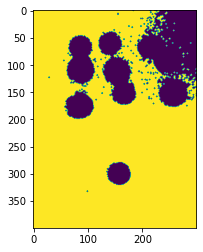

In [34]:
# Thresholding and Local Thresholding 

im = close_open #.astype(float)                
# normarlize the intensity values a range between 0 and 1
im = im-im.min()                    
im = im/im.max()
# threshold the image 
imbw = im < .4;
from skimage.filters import threshold_otsu
thresh = threshold_otsu(im2)
im_thresh = im > thresh
plt.imshow(im_thresh)


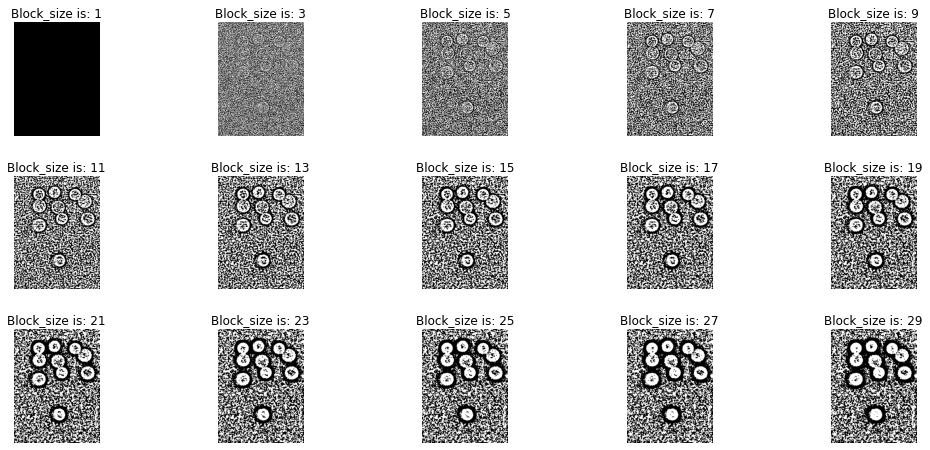

In [43]:
# try different block_sizes
from skimage import filters

def block_sizes (im ):
    i= 1
    plt.figure(figsize=(18,8))
    for i in range(1,30, 2):
        plt.subplot(3,10,i)
        imbw = im < filters.threshold_local(im, i,method = 'mean')
        plt.imshow(imbw, cmap ="gray");plt.axis('off')
        plt.title(f"Block_size is: {i}")
        i = i + 1
    return plt.show()
        
block_sizes (close_open)
#

In [ ]:
im2 = white_tophat(im2, disk(30));
plt.figure
plt.imshow(im2,cmap='gray')